## Data Analysis of potential factors affecting water pipe breakage

Using the dataset of water pipe and breakage history over the years,

I have analyzed the dataset and made insights report on potential factors affecing the water pipes breakage.

I have documented all processes and achievements in this notebook with following steps:

- EDA
- Data cleaning
- Analysis findings #1
- Data Analysis of numerical variables Part 1
- Analysis findings #2
- Data Analysis of numerical variables Part 2
- Data Analysis of categorial variable
- Analysis findings #3
- Correlation
- Conclusion


Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [2]:
df = pd.read_csv('pipe_data.csv')
df.head()

,pipe_id,install_year,material,diameter,break_year,env_dat_0,env_dat_1,env_dat_2,env_dat_3,env_dat_4,...,env_dat_135,env_dat_136,env_dat_137,env_dat_138,env_dat_139,env_dat_140,env_dat_141,env_dat_142,env_dat_143,env_dat_144
0,P0000000000,1985,D,20.32,NaN,623.542175,18.052843,14.161422,10.268579,159.662827,...,554.479675,20.000000,0.000038,438.628143,27.000000,3085.786865,0.002728,0.311803,0.0,0.0
1,P0000000001,1934,C,15.24,NaN,644.830017,17.790001,13.830000,9.870000,257.001221,...,276.357605,9.200573,0.304329,239.719299,32.571018,3188.292236,0.003291,0.322161,0.0,0.0
2,P0000000002,1904,C,20.32,NaN,604.570007,18.219999,14.350000,10.470000,225.165039,...,236.882950,4.872639,0.182168,500.638367,28.978306,4542.257324,0.002928,0.458972,0.0,0.0
3,P0000000003,1979,D,15.24,NaN,573.424011,17.671381,14.132636,10.586646,170.244339,...,321.886658,12.353504,0.480517,295.554504,41.983772,4521.720215,0.004242,0.456897,0.0,0.0
4,P0000000004,1987,D,20.32,NaN,583.429993,18.280001,14.350000,10.420000,171.034073,...,758.841431,25.052542,0.021532,778.687256,25.842377,4978.718262,0.002611,0.503074,0.0,0.0


In [3]:
df.shape

(25115, 150)

In [4]:
df['pipe_id'].nunique()

24581

**Column Description**

*  pipe_id - Unique ID for each pipe

*  install_year - Year when the pipe was installed
*  break_year - Year when the pipe was broken
*  material - Material of the pipe
*  diameter - Diameter of the pipe


*  env_dat_xxx - Environments around the pipe; utilization of these columns are excluded from this report as column details were not found with the dataset

## Exploratory Data Analysis

First of all, I will start with removing unnecessary columns for analysis as:

- env_dat_xxx columns are not utilized in this data anaysis

In [5]:
df = df[df.columns[:5]]
df.head()

,pipe_id,install_year,material,diameter,break_year
0,P0000000000,1985,D,20.32,NaN
1,P0000000001,1934,C,15.24,NaN
2,P0000000002,1904,C,20.32,NaN
3,P0000000003,1979,D,15.24,NaN
4,P0000000004,1987,D,20.32,NaN


In [6]:
df.shape

(25115, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25115 entries, 0 to 25114
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pipe_id       25115 non-null  object 
 1   install_year  25115 non-null  int64  
 2   material      25115 non-null  object 
 3   diameter      24985 non-null  float64
 4   break_year    1479 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 981.2+ KB


Quick basic EDA shows that dataset has data of 56774 records,

after removing unnecessary columns for analysis there are 5 variables

and they are all numerical variables except pipe_id and material

**Target variable**

In [8]:
df['break_year'].value_counts(dropna=False)

NaN       23636
2015.0       75
1990.0       66
1988.0       62
1993.0       57
1982.0       57
2008.0       53
1984.0       48
2016.0       48
2004.0       47
2013.0       45
2009.0       45
1983.0       44
1989.0       43
1987.0       43
1986.0       42
2003.0       39
2014.0       38
2011.0       38
1981.0       37
2007.0       37
1992.0       37
1991.0       36
1980.0       36
2010.0       35
2012.0       35
1985.0       34
1995.0       34
2001.0       34
2006.0       32
1994.0       30
2005.0       30
2002.0       26
1998.0       26
1997.0       24
1996.0       22
1999.0       22
2000.0       22
Name: break_year, dtype: int64

In [9]:
df['break_year'].agg(['max', 'min'])

max    2016.0
min    1980.0
Name: break_year, dtype: float64

In this analysis the target variable is break_year, which has the year the pipe broke if the pipe has broken

and the oldest year in the variable is 1980, the most recent is 2016

If the break_year is not recorded, the pipe has no record of breakage

and I will compare the number of pipe breakage with no breakage record in the dataset

In [10]:
data = df.copy()
data['break_year'] = data['break_year'].fillna(0)
data['break_year'] = data['break_year'].apply(lambda x: 1 if x != 0 else 0)

In [11]:
break_year = data['break_year'].value_counts()
break_year

0    23636
1     1479
Name: break_year, dtype: int64

In [12]:
print('NO breakage record', round((break_year[0]/len(data)*100),2), 'percent')
print('record of breakage', round((break_year[1]/len(data)*100),2), 'percent')

NO breakage record 94.11 percent
record of breakage 5.89 percent


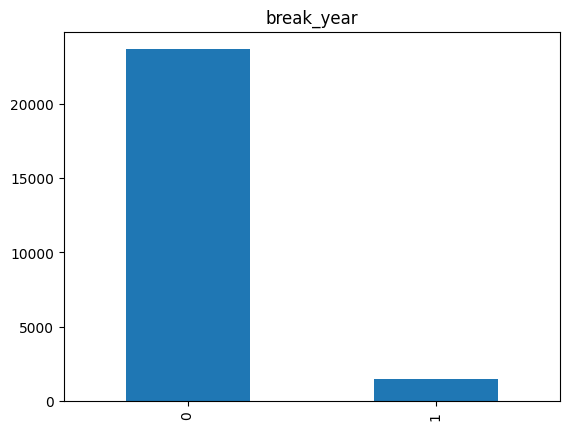

In [13]:
data['break_year'].value_counts().plot.bar()
plt.title('break_year')
plt.show()

To look into the balance of break_year variable, meaning the ratio of pipe breakage and no breakage record,

I made the variable categorial - 0 if no breakage record, 1 if record of pipe breakage

As visualized in the bar plot, nearly 95% of the dataset is the data of no breakage and only about 5% is data of breakage

This tells that the dataset is significantly imbalance as class 1, breakage records in this case have significantly low proportions compared to class 0

**Input variables**

pipe_id - categorical

In [14]:
df['pipe_id'].nunique()

24581

install_year - numerical and temporal

In [15]:
df['install_year'].nunique()

156

material - categorical

In [16]:
df['material'].nunique()

5

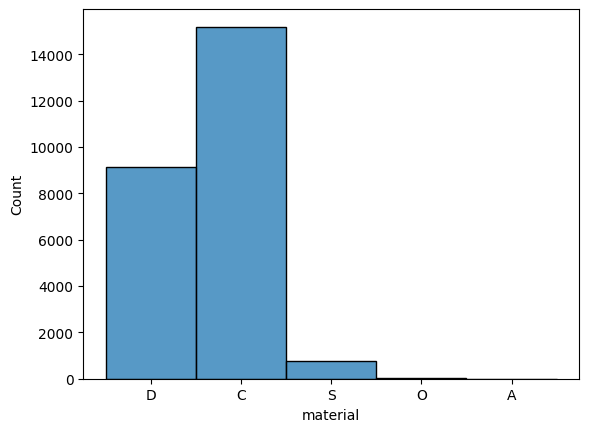

In [17]:
sns.histplot(x=df['material'], data=df)
plt.show()

diameter - numerical

In [18]:
df['diameter'].nunique()

21

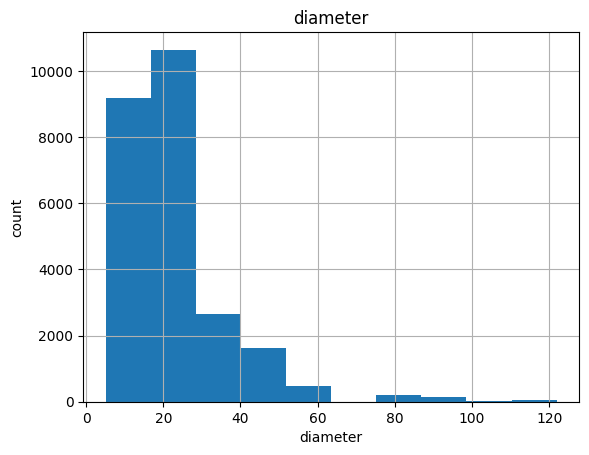

In [19]:
data = df
df['diameter'].hist(bins=10)
plt.xlabel('diameter')
plt.ylabel('count')
plt.title('diameter')
plt.show()

break_year - numerical and temporal

In [20]:
df['break_year'].nunique()

37

## Data Cleaning

Now that very quick and basic EDA on the raw dataset is done,

I will clean the data starting with handling missing values and duplicates

**Missing values**

In [21]:
df.isnull().sum()

pipe_id             0
install_year        0
material            0
diameter          130
break_year      23636
dtype: int64

diameter variable has 314 missing values,

break_year also has 53630 missing values, however as shown in the section earlier,

break_year is target variable and NaN values mean NOT breakage record so we treat these values as 'NO record' rather than values missing

**Duplicates**



Checking if pipe_id variable is all unique values,

if so, it is simply unique ID assigned to each pipe and pipes have no duplicate/multipe records and the variable can be removed as unique IDs will not affect the analysis and the target variable,

if not, it needs to be looked into for duplicates and data cleaning

In [22]:
df['pipe_id'].duplicated().sum()

534

It tells that not all values in the variable are unique,

most likely it is because some pipes have multiple rows/records

so this needs to be looked into before dealing with missing values

In [23]:
df['pipe_id'].nunique()

24581

The dataset has records of 55559 unique pipes,

now I will look into pipes with multiple records

In [24]:
multiple_records = df[df['pipe_id'].duplicated(keep=False)]
multiple_records['pipe_id'].value_counts()

P0000008827    9
P0000024104    9
P0000012123    7
P0000023285    6
P0000023522    6
              ..
P0000000501    3
P0000015424    3
P0000015466    3
P0000004616    3
P0000000114    3
Name: pipe_id, Length: 219, dtype: int64

Out of 55559 unique pipes in the dataset,
498 pipes have multiple records.

And I will look into the pipe with ID 'P0000031371', this is the pipe with maximum number of multiple records of 10

In [25]:
df[df['pipe_id'] == 'P0000031371']

,pipe_id,install_year,material,diameter,break_year


So this particular pipe, has 10 records in the dataset

Since it was installed in 1949, it has broken 9 times,

there is one row/record with no breakage,

assuming this particular pipe was not broken at a certain inspection/maintenance period, or perhaps this particular no breakage record was recorded between 1949 (when it was first installed) and 1982, when its first breakage was recorded

Now 2 steps are needed to clean multiple_records data for analysis:

1. Any pipes with multiple records must have its no breakage records removed
so that I can only associate its breakage records

2. After Step 1, I will create new column that ranks each pipe's breakage record from oldest to recent so that each breakage record can tell whether the same pipe has broken in the past

In [26]:
df.duplicated().sum()

0

Before performing the 2 steps, checked that there is no duplicated records of the same pipe with same break_year or duplicated no records

Another thing I will check before removing records is diameter variable missing values in pipes with multiple records

In [27]:
df.isnull().sum()

pipe_id             0
install_year        0
material            0
diameter          130
break_year      23636
dtype: int64

If pipes are missing their diameter values but have multiple records, the diameter value of exact same pipe can be extracted and copied for the same pipe

In [28]:
df[df['pipe_id'].duplicated(keep=False)&df['diameter'].isnull()]

,pipe_id,install_year,material,diameter,break_year


Unfortunately pipes with multiple records with missing diameter values all have the values missing so I will have to deal with missing values after the 2 steps data cleaning.

Step 1. Any pipes with multiple records must have its no breakage records removed
so that I can only associate its breakage records

In [29]:
df2 = df.copy()

In [30]:
drop_index = df2[df2['pipe_id'].duplicated(keep=False)&df2['break_year'].isnull()].index
drop_index

Int64Index([  114,   504,   634,   746,   771,  1372,  1468,  1561,  1659,
             1748,
            ...
            24300, 24616, 24653, 24716, 24720, 24734, 24740, 24810, 24900,
            24925],
           dtype='int64', length=219)

In [31]:
df2 = df2.drop(drop_index)
len(df2)

24896

Step 2. I will create new column that ranks each pipe's breakage record from oldest to recent so that each breakage record can tell whether the same pipe has broken in the past

In [32]:
df2['history'] = df2.groupby('pipe_id')['break_year'].rank().fillna(0)
df2.head()

,pipe_id,install_year,material,diameter,break_year,history
0,P0000000000,1985,D,20.32,NaN,0.0
1,P0000000001,1934,C,15.24,NaN,0.0
2,P0000000002,1904,C,20.32,NaN,0.0
3,P0000000003,1979,D,15.24,NaN,0.0
4,P0000000004,1987,D,20.32,NaN,0.0


Now 2 steps of data cleaning is done,

new 'history' variable is added to the dataset and value is 0 if the record is not a breakage record, and if the record is of breakage, it can tell the nth breakage of the particular pipe in order or break_year,

I will look into the same pipe I looked into previously with most number of recrods again to see how the data looks after data cleaning

In [33]:
df2[df2['pipe_id'] == 'P0000031371']

,pipe_id,install_year,material,diameter,break_year,history


Now that data had some cleaning done and history variable of breakage has been added, I can add following insights at this stage:

## Analysis findings #1

In [34]:
print('Number of unique pipes in the dataset:', df2['pipe_id'].nunique())

broken_pipe = df2[df2['history'] > 0]['pipe_id'].nunique()
print('Number of pipes that have breakeage record:', broken_pipe,'-',  round(broken_pipe/df2['pipe_id'].nunique()*100, 2), '%')

no_breakage_pipe = len(df2[df2['history'] == 0])
print('Number of pipes that have NO breakeage record:', no_breakage_pipe,'-',  round(no_breakage_pipe/df2['pipe_id'].nunique()*100, 2), '%')

Number of unique pipes in the dataset: 24581
Number of pipes that have breakeage record: 1164 - 4.74 %
Number of pipes that have NO breakeage record: 23417 - 95.26 %


In [35]:
temp = df2.copy()
temp['history'] = temp['history'].apply(lambda x: 1 if x != 0 else 0)

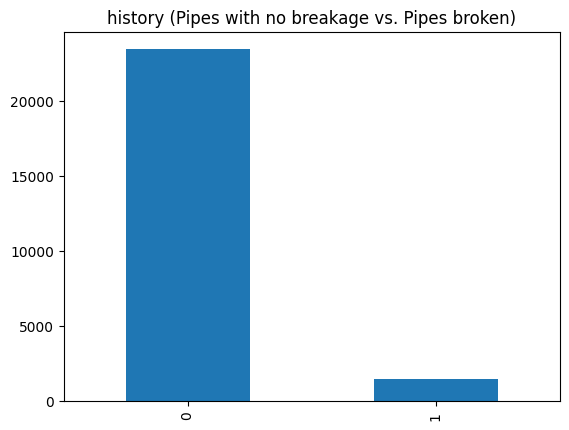

In [36]:
temp['history'].value_counts().plot.bar()
plt.title('history (Pipes with no breakage vs. Pipes broken)')
plt.show()

The ratio/balance of no breakage data against breakage data is still significantly imbalance

Missing values

Data has been cleaned and taking a look at missing values for diameter variable again

In [37]:
df2.isnull().sum()

pipe_id             0
install_year        0
material            0
diameter          130
break_year      23417
history             0
dtype: int64

In [38]:
df2['diameter'].isnull().sum() / len(df2) * 100

0.5221722365038561

Since number of records missing diameter values is 311 and accounts for only 0.55% of the dataset, I will go with removing the records for analysis this time

unless the 311 records show significantly different imbalance or ratio on their break_year or history values

In [39]:
diameter_missing = df2.copy()
diameter_missing['break_year'] = diameter_missing['break_year'].fillna(0)
diameter_missing['break_year'] = diameter_missing['break_year'].apply(lambda x: 1 if x != 0 else 0)

In [40]:
no_diameter = diameter_missing[diameter_missing['diameter'].isnull()]

In [41]:
len(no_diameter)

130

In [42]:
print('Number of unique pipes with no diameter values:', no_diameter['pipe_id'].nunique())

broken_pipe = no_diameter[no_diameter['history'] > 0]['pipe_id'].nunique()
print('Number of pipes with no diameter values that have breakeage record:', broken_pipe,'-',  round(broken_pipe/no_diameter['pipe_id'].nunique()*100, 2), '%')

no_breakage_pipe = len(no_diameter[no_diameter['history'] == 0])
print('Number of pipes with no diamter values that have NO breakeage record:', no_breakage_pipe,'-',  round(no_breakage_pipe/no_diameter['pipe_id'].nunique()*100, 2), '%')

Number of unique pipes with no diameter values: 130
Number of pipes with no diameter values that have breakeage record: 3 - 2.31 %
Number of pipes with no diamter values that have NO breakeage record: 127 - 97.69 %


As checked that the ratio of no breakage against breakage of pipes with no diameter values are similar to the ratio by the whole dataset,

I will drop the records with no diameter values as it will not affect the anaysis

In [43]:
df2 = df2[df2['diameter'].notnull()]
len(df2)

24766

Update on the overview of the dataset after records removed

In [44]:
print('Number of unique pipes in the dataset:', df2['pipe_id'].nunique())

broken_pipe = df2[df2['history'] > 0]['pipe_id'].nunique()
print('Number of pipes that have breakeage record:', broken_pipe,'-',  round(broken_pipe/df2['pipe_id'].nunique()*100, 2), '%')

no_breakage_pipe = len(df2[df2['history'] == 0])
print('Number of pipes that have NO breakeage record:', no_breakage_pipe,'-',  round(no_breakage_pipe/df2['pipe_id'].nunique()*100, 2), '%')

Number of unique pipes in the dataset: 24451
Number of pipes that have breakeage record: 1161 - 4.75 %
Number of pipes that have NO breakeage record: 23290 - 95.25 %


## Data Analysis of numerical variables Part 1

I will start analysing numerical variables starting with two temporal variables of install_year and break_year

I will quicky check if any records have its break_year values smaller(older) than values in install_year,

just to make sure that there is no invalid records entered by mistakes or so

In [45]:
temp = df2.copy()
temp = temp[temp['break_year'].notnull()]

In [46]:
temp[temp['break_year'] < temp['install_year']]

,pipe_id,install_year,material,diameter,break_year,history


In [47]:
for variable in ['install_year', 'break_year']:
  print(variable)
  print(df2[variable].min(), '~', df2[variable].max())
  print('record of', str(df2[variable].max() - df2[variable].min()), 'years')
  print()

install_year
1861 ~ 2016
record of 155 years

break_year
1980.0 ~ 2016.0
record of 36.0 years



This finding is quite important,

the dataset has records of pipe installed since 1861 up to 2017, range of 156 years

however when it comes to break_year variable, only breakage after 1980 up to 2016 is in the dataset

This means any breakages pipes may have had before year 1980 is not part of the dataset, and this must be a contributor for why the break_year variable is so imbalance when transformed into categorical variable as breakage records are certainly missing in contrast to all the data of install_year data since 1861

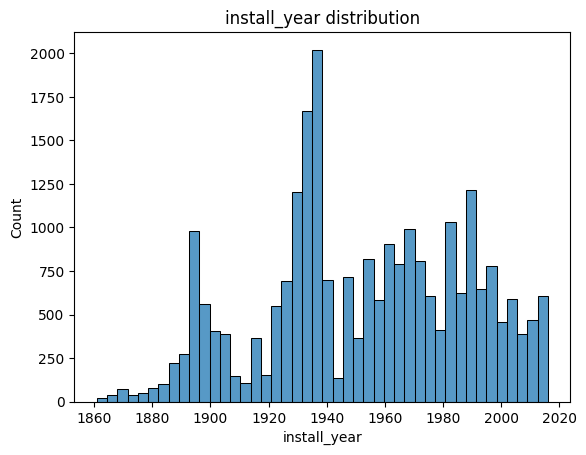

In [48]:
sns.histplot(x=df2['install_year'], data=df)
plt.title('install_year distribution')
plt.show()

The histogram shows that install_year count does span from 1861 and continuously,

so for further analysis, it must be taken into account that break_year data is not present for years before 1980

and breakage is only recorded up to 2016, meaning I should remove records with install_year in 2017 as whether these pipes have already broken or not in 2017 is unknown/not recorded so should be removed for this analysis

In [49]:
df2 = df2[df2['install_year'] != 2017]
len(df2)

24766

Now looking at relation between install_year and break_year

In [50]:
df2.groupby('install_year')['break_year'].count()

install_year
1861    1
1862    0
1863    0
1864    0
1865    1
       ..
2012    0
2013    0
2014    0
2015    0
2016    0
Name: break_year, Length: 156, dtype: int64

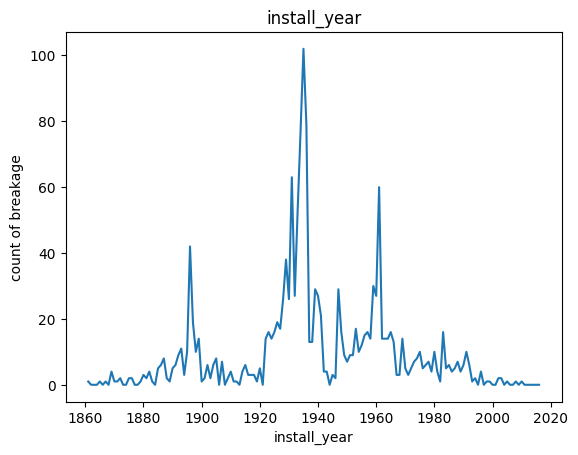

In [51]:
df2.groupby('install_year')['break_year'].count().plot()
plt.xlabel('install_year')
plt.ylabel('count of breakage')
plt.title("install_year")
plt.show()

In [52]:
df2.groupby('break_year')['pipe_id'].count()

break_year
1980.0    36
1981.0    37
1982.0    56
1983.0    44
1984.0    48
1985.0    34
1986.0    42
1987.0    43
1988.0    62
1989.0    43
1990.0    65
1991.0    36
1992.0    37
1993.0    57
1994.0    30
1995.0    34
1996.0    22
1997.0    24
1998.0    26
1999.0    22
2000.0    22
2001.0    34
2002.0    26
2003.0    39
2004.0    47
2005.0    29
2006.0    32
2007.0    37
2008.0    53
2009.0    45
2010.0    35
2011.0    38
2012.0    35
2013.0    45
2014.0    38
2015.0    75
2016.0    48
Name: pipe_id, dtype: int64

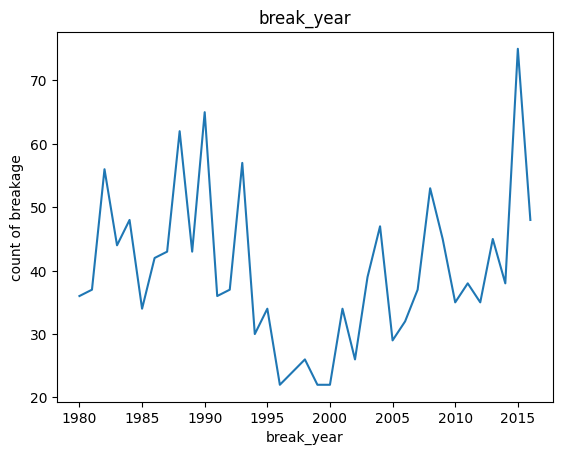

In [53]:
df2.groupby('break_year')['pipe_id'].count().plot()
plt.xlabel('break_year')
plt.ylabel('count of breakage')
plt.title('break_year')
plt.show()

In [54]:
df2.groupby('install_year')['break_year'].count().sort_values(ascending=False).head()

install_year
1935    102
1936     79
1934     77
1931     63
1961     60
Name: break_year, dtype: int64

In [55]:
df2.groupby('break_year')['pipe_id'].count().sort_values(ascending=False).head()

break_year
2015.0    75
1990.0    65
1988.0    62
1993.0    57
1982.0    56
Name: pipe_id, dtype: int64

In [56]:
df2.groupby('break_year')['pipe_id'].count().sort_values(ascending=True).head()

break_year
2000.0    22
1999.0    22
1996.0    22
1997.0    24
1998.0    26
Name: pipe_id, dtype: int64

For install_year, pipes installed in year 1935 had most number of breakage,

and 1934 and 1936 also having high numbers of breakage as well as another hike in 1961

For break_year, 2015 had most numbers of breakage and least numbers in 1996

In the next step, instead of looking at install_year in the year the pipe was installed, I will interpret how install_year relates to break_year by looking at the number of years since install_year with break_year

New variable - pipe_year

In [57]:
df3 = df2.copy()

In [58]:
df3['install_year'] = df3['install_year'].astype('float64')

In [59]:
df3['break_year'] = df3['break_year'].fillna(0)

In [60]:
df2['pipe_year'] = [df3['break_year'][x] - df3['install_year'][x] if df3['break_year'][x] > 0 else df2['break_year'][x] for x in df3.index]

In [61]:
df2.head()

,pipe_id,install_year,material,diameter,break_year,history,pipe_year
0,P0000000000,1985,D,20.32,NaN,0.0,NaN
1,P0000000001,1934,C,15.24,NaN,0.0,NaN
2,P0000000002,1904,C,20.32,NaN,0.0,NaN
3,P0000000003,1979,D,15.24,NaN,0.0,NaN
4,P0000000004,1987,D,20.32,NaN,0.0,NaN


New variable pipe_year has been added,

so for every breakage record, this variable shows the number of years between the year the pipe was installed and broke

In earlier section I looked into the actual years the pipes were installed and broke, this time looking into the pipe_year values of pipes when pipes broke

## Analysis findings #2

In [62]:
pipe_year_grouped = df2.groupby('pipe_year', as_index=False)['break_year'].count()
pipe_year_grouped.sort_values('break_year', ascending=False)

,pipe_year,break_year
59,59.0,32
51,51.0,31
53,53.0,28
57,57.0,28
45,45.0,27
...,...,...
11,11.0,1
131,134.0,1
132,138.0,1
133,139.0,1


In [63]:
pipe_year_grouped['pipe_year'].agg(['min', 'max', 'mean'])

min       0.000000
max     140.000000
mean     67.244444
Name: pipe_year, dtype: float64

The current dataset has 3128 breakage records and

pipe_year variable values range from 0 to 140 years


surprisingly, 0 pipe_year had the second highest numbers of breakage meaning 57 pipes had its breakage in its first year of installation already and possibly another breakages later on in its pipe_years, many breakages do happen in its first years of installaion, but whether it is because of particular materials, diameter, factors other than pipe_year need to be looked at

I can also see small numbers of breakage at pipe_year with more than 130 years, I think breakage with such old pipe_year is natural however assuming their breakages are limited in this particular dataset as number of unique pipes with such long pipe_year must be limited in the data to start with (mean of pipe_year is 68 years), so I will do a quick check

First, looking at breakage with 0 pipe_year

In [64]:
df2[df2['pipe_year'] == 0]

,pipe_id,install_year,material,diameter,break_year,history,pipe_year
402,P0000000400,1986,D,20.32,1986.0,1.0,0.0
947,P0000000936,1983,D,20.32,1983.0,1.0,0.0
1435,P0000001422,1984,D,15.24,1984.0,1.0,0.0
1747,P0000001727,1998,D,30.48,1998.0,1.0,0.0
2893,P0000002861,1991,D,20.32,1991.0,1.0,0.0
6816,P0000006705,1992,D,15.24,1992.0,1.0,0.0
9714,P0000009559,1983,D,20.32,1983.0,1.0,0.0
10737,P0000010565,1983,D,20.32,1983.0,1.0,0.0
12066,P0000011873,1983,D,20.32,1983.0,1.0,0.0
13489,P0000013270,1990,S,121.92,1990.0,1.0,0.0


In [65]:
df2[df2['pipe_year'] == 0].groupby('material')['diameter'].mean()

material
D     21.166667
S    121.920000
Name: diameter, dtype: float64

Quick look on the 57 records of pipe_year 0 shows most records are with material D or S with exceptionally large diameters,

I will take a note on this when I look into the diameter variable

Secondly, looking at breakage with 53 pipe_year

In [66]:
df2[df2['pipe_year'] == 53]

,pipe_id,install_year,material,diameter,break_year,history,pipe_year
1184,P0000001173,1959,C,10.16,2012.0,1.0,53.0
1685,P0000001665,1930,C,15.24,1983.0,1.0,53.0
4167,P0000004111,1949,C,40.64,2002.0,1.0,53.0
4681,P0000004616,1947,C,30.48,2000.0,2.0,53.0
5748,P0000005654,1939,C,15.24,1992.0,1.0,53.0
5998,P0000005899,1936,C,30.48,1989.0,1.0,53.0
7846,P0000007727,1937,C,20.32,1990.0,1.0,53.0
9184,P0000009033,1940,C,20.32,1993.0,1.0,53.0
13163,P0000012958,1939,C,15.24,1992.0,1.0,53.0
13177,P0000012972,1931,C,15.24,1984.0,1.0,53.0


In [67]:
df2[df2['pipe_year'] == 53].groupby('material')['diameter'].mean()

material
C    18.687143
Name: diameter, dtype: float64

In [68]:
df2[df2['pipe_year'] == 53].groupby('history')['pipe_id'].count()

history
1.0    22
2.0     6
Name: pipe_id, dtype: int64

Differences I see between breakage with 0 pipe_year and 53 pipe_year are:

*   Most records for 0 pipe_year was material D, but with 53 pipe_year material C
*   0 pipe_year records are all history 1/first breakage (which makes sense), with 53 pipe_year majority is also the same, but also with second and third breakages for the same pipe

These notes will be saved for later when I look into other variables and look into whether there is different patterns in breakages with different pipe_year

Thirdly, breakage with more than 130 pipe_year

In [69]:
df2[df2['pipe_year'] >= 130]

,pipe_id,install_year,material,diameter,break_year,history,pipe_year
1492,P0000001477,1867,C,15.24,1998.0,1.0,131.0
6558,P0000006447,1883,C,15.24,2013.0,1.0,130.0
7256,P0000007141,1869,C,20.32,2002.0,1.0,133.0
13854,P0000013623,1881,C,15.24,2015.0,1.0,134.0
14562,P0000014318,1870,C,20.32,2008.0,1.0,138.0
15056,P0000014797,1876,C,10.16,2015.0,1.0,139.0
15449,P0000015183,1882,C,20.32,2015.0,1.0,133.0
24652,P0000024135,1875,C,20.32,2015.0,2.0,140.0


The latest install_year in the dataset is 2016,
so any pipes with breakage must be installed before 1886 in order to be included in this group

In [70]:
df2[df2['install_year'] <= 1886]

,pipe_id,install_year,material,diameter,break_year,history,pipe_year
55,P0000000055,1868,C,20.32,NaN,0.0,NaN
157,P0000000155,1880,C,30.48,NaN,0.0,NaN
218,P0000000216,1863,C,15.24,NaN,0.0,NaN
229,P0000000227,1867,C,15.24,NaN,0.0,NaN
238,P0000000236,1883,C,20.32,NaN,0.0,NaN
...,...,...,...,...,...,...,...
24696,P0000024178,1882,C,25.40,NaN,0.0,NaN
24786,P0000024260,1886,C,15.24,NaN,0.0,NaN
24797,P0000024271,1881,C,15.24,NaN,0.0,NaN
24962,P0000024428,1870,C,20.32,NaN,0.0,NaN


In [71]:
df2[df2['install_year'] <= 1886].groupby('material').count()

,pipe_id,install_year,diameter,break_year,history,pipe_year
material,,,,,,
C,502,502,502,37,502,37


In [72]:
round(len(df2[df2['pipe_year'] >= 130]) / 853 * 100, 2)

0.94

I have to note here that out of all 853 records of pipes installed before 1886, only 1.41% of the records are of breakage, meaning most of 853 records are of pipes installed before 1886 but looks as though still no record of breakage in 2016, and even the records of breakage are mostly of the first breakage of the pipe probably largely due to how breakage is only recorded from 1980 onwards in this dataset as covered earlier in this notebook

Still, this is quite surprising considering the ratio of breakage with no breakage ratio of the entire dataset earlier, as well as how significant number of pipes already broke in its first year of installation

Only D and S material pipes broke in 0 pipe_year,

only C material broke in pipe_year more than 130 years, but only material C pipes were installed at the time so there is strong relation between install_year, material, history and pipe_year variables

Still an asuumption at this stage with not looking at other variables yet, certain pipes do break in its first year, at the same time certain pipes with possibly other conditions, may manage to keep itself break-free even 130 years after its installation


## Data Analysis of numerical variables Part 2

history variable

In [73]:
# 3128 breakage in the dataset, by hisotry

df2[df2['history'] > 0].groupby('history', as_index=False)['pipe_year'].count()

,history,pipe_year
0,1.0,1161
1,2.0,219
2,3.0,60
3,4.0,20
4,5.0,9
5,6.0,3
6,7.0,2
7,8.0,2


In [74]:
# average pipe_year by history

df2[df2['history'] > 0].groupby('history', as_index=False)['pipe_year'].mean()

,history,pipe_year
0,1.0,58.272179
1,2.0,62.461187
2,3.0,63.983333
3,4.0,66.300000
4,5.0,62.777778
5,6.0,60.666667
6,7.0,56.000000
7,8.0,61.500000


diameter variable

This is a continuous variable, so I will check and understand its distribution with histogram and check for outliers

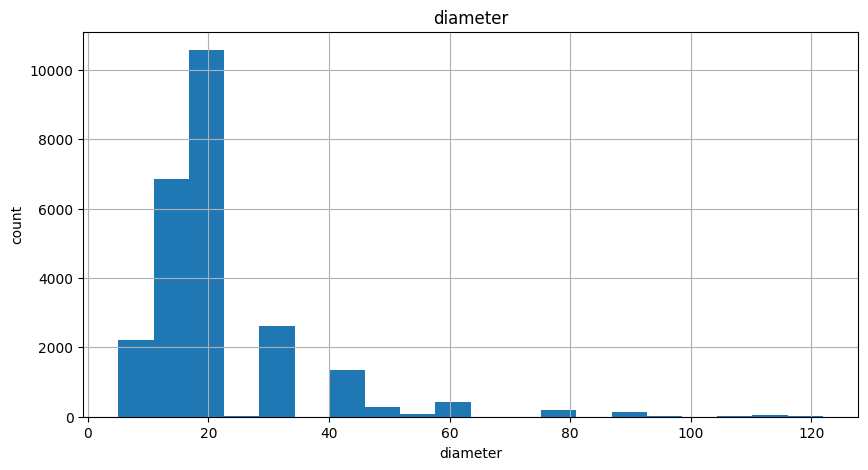

In [75]:
df2['diameter'].hist(bins=20, figsize=(10,5))
plt.xlabel('diameter')
plt.ylabel('count')
plt.title('diameter')
plt.show()

In [76]:
diameter_plot = df2.iloc[:, 3].to_frame()

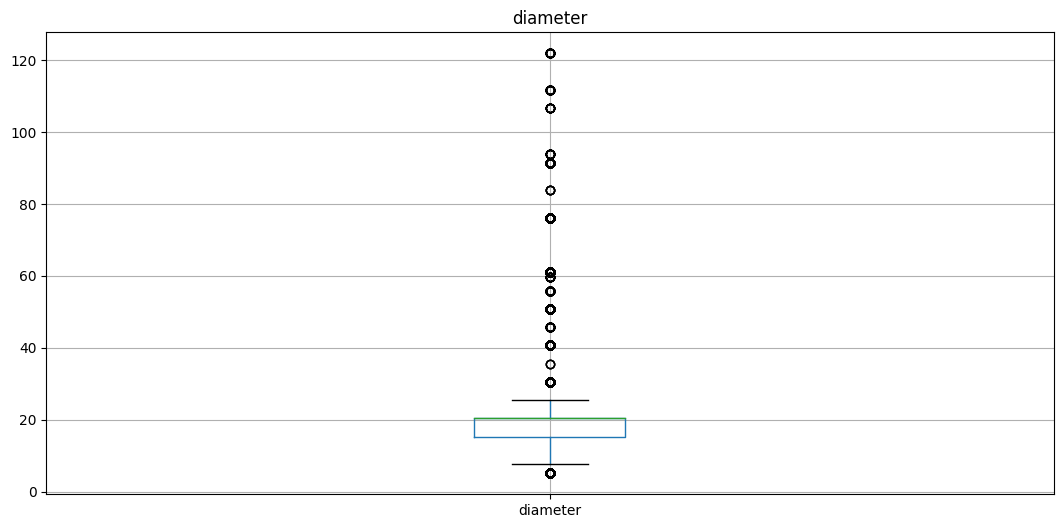

In [77]:
diameter_plot.boxplot(figsize=(13, 6))
plt.title('diameter')
plt.show()

The histogram shows the values are not continuous, there are certain gaps in the diameter values and the boxplot shows some outliers

What I see here and what I have noted earlier from other variables are telling me that diameter lengths (values) may be in numbers of fixed values and the values differ by material variables and I will start on checking this

In [78]:
df2['diameter'].nunique()

21

In [79]:
df2['diameter'].value_counts()

20.32     10569
15.24      6864
30.48      2611
10.16      1775
40.64      1308
60.96       397
5.08        390
50.80       270
76.20       186
91.44       129
55.88        66
7.62         48
111.76       36
45.72        29
121.92       28
93.98        17
59.69        16
106.68       11
25.40         8
83.82         5
35.56         3
Name: diameter, dtype: int64

So the pipes do come in 21 different fixed lengths which explains the gap in the histogram earlier

In [80]:
df2.groupby(['material', 'diameter'])['diameter'].count()

material  diameter
A         15.24          1
          20.32          1
C         5.08         277
          7.62          41
          10.16       1319
          15.24       5202
          20.32       5023
          25.40          5
          30.48       1580
          35.56          3
          40.64        884
          45.72          3
          50.80        183
          55.88         51
          59.69         16
          60.96        210
          76.20         69
          83.82          5
          91.44         39
          93.98         17
          106.68         4
          111.76         6
          121.92        10
D         5.08          96
          7.62           7
          10.16        454
          15.24       1658
          20.32       5542
          25.40          3
          30.48       1021
          40.64        321
          50.80          5
          60.96         21
          106.68         4
O         5.08          17
S         10.16          2
         

Now I can see how each material pipe has different certain fixed length of diameter,

for an example material A pipe comes in 2 different diameters

and material C pipe comes in almost all of the fixed lengths of diameter available

This finding explains the outliers seen in boxplot as well as how I saw the obvious different mean of diameters with different pipe material when looking into pipe_year variable

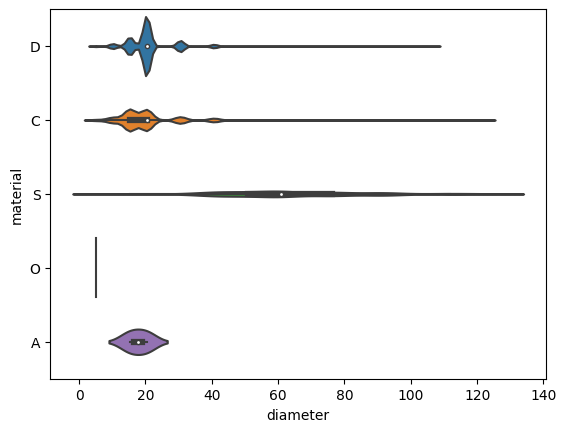

In [81]:
sns.violinplot(y = df2['material'], x=df2['diameter'])
plt.show()

In [82]:
df2.groupby('material', as_index=False)['diameter'].mean()

,material,diameter
0,A,17.780000
1,C,21.407746
2,D,20.722473
3,O,5.080000
4,S,65.781437


In [83]:
df2['diameter'].agg(['min', 'max'])

min      5.08
max    121.92
Name: diameter, dtype: float64

There is strong relation between material and diameter variables,

material O pipe only comes in one fixed diameter of 5.08,

which is also the mean diameter value for material O as well as the minimum value of the diameter variable

so having more breakage records of material O pipe will significanty lower the mean value of diameter of broken pipes

whereas material S pipe has the biggest mean value of diameter as the pipe diameter range is the biggest and also includes the outlier values shown in the boxplot,

and having more material S pipe breakage will raise the mean value of diameter of broken pipes

In [84]:
df2['diameter'].nunique()

21

As seen earlier, diameter values come in 21 fixed lengths

In [85]:
df2[df2['break_year'] > 0]['diameter'].nunique()

18

And pipes that have breakage records come in 18 fixed lengths

In [86]:
diameter_all = df2['diameter'].unique()
diameter_broke = df2[df2['break_year'] > 0]['diameter'].unique()

diff = [x for x in diameter_all if x not in diameter_broke]
diff

[106.68, 35.56, 25.4]

meaning pipes with 3 fixed lengths in the list above do not have breakage records in the dataset

and certain combinations of material and diameter also do not have any breakages in the dataset as per dataframe below

In [87]:
df2.groupby(['material', 'diameter'])['diameter', 'break_year'].count()

diameter  break_year
material diameter                      
A        15.24            1           0
         20.32            1           0
C        5.08           277          20
         7.62            41           4
         10.16         1319         100
         15.24         5202         516
         20.32         5023         399
         25.40            5           0
         30.48         1580         154
         35.56            3           0
         40.64          884          56
         45.72            3           0
         50.80          183           5
         55.88           51           1
         59.69           16           3
         60.96          210          14
         76.20           69           4
         83.82            5           3
         91.44           39           3
         93.98           17           2
         106.68           4           0
         111.76           6           1
         121.92          10           2
D        5.08            96           4
         7.62             7           1
         10.16          454           9
         15.24         1658          34
         20.32         5542          74
         25.40            3           0
         30.48         1021          28
         40.64          321           4
         50.80            5           1
         60.96           21           0
         106.68           4           0
O        5.08            17           4
S        10.16            2           0
         15.24            3           0
         20.32            3           1
         30.48           10           0
         40.64          103           3
         45.72           26           2
         50.80           82           5
         55.88           15           0
         60.96          166           4
         76.20          117           3
         91.44           90           6
         106.68           3           0
         111.76          30           3
         121.92          18           3

## Data Analysis of categorial variable


material variable

In [88]:
df2['material'].value_counts()

C    14947
D     9132
S      668
O       17
A        2
Name: material, dtype: int64

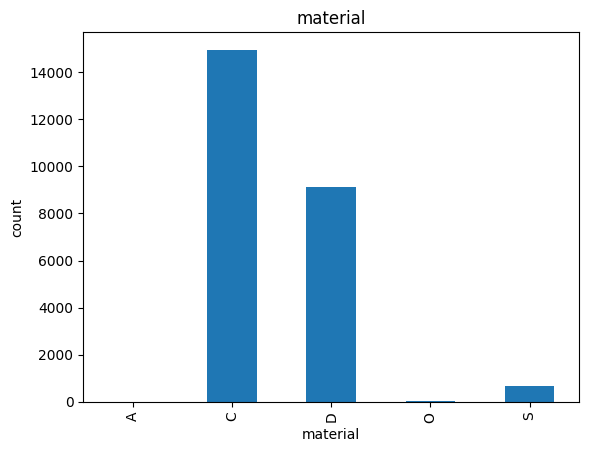

In [89]:
df2.groupby('material')['pipe_id'].count().plot.bar()
plt.xlabel('material')
plt.ylabel('count')
plt.title('material')
plt.show()

In [90]:
material_df = df2.groupby('material', as_index=False)[['pipe_id', 'break_year']].count()
material_df = material_df.sort_values('pipe_id', ascending=False)
material_df = material_df.rename(columns={'pipe_id':'count', 'break_year':'breakage count'})
material_df

,material,count,breakage count
1,C,14947,1287
2,D,9132,155
4,S,668,30
3,O,17,4
0,A,2,0


Majority of the records are material C or D types, which creates bias and overall mean, medians, etc. will be heavily affected by the dominant material values

Target variable is heavily imbalance to start with, so not having enough records for rest of the materials mean lack of breakage records for such material values like material A has zero breakage record

In [91]:
df2.groupby('material', as_index=False)['pipe_year'].mean().sort_values('pipe_year', ascending=False)

,material,pipe_year
1,C,65.216006
4,S,40.533333
3,O,21.000000
2,D,14.496774
0,A,NaN


Mean pipe_year by material variable shows wide gaps, and this make sense looking back at how pipes installed more than 130 years ago were all material C pipes

This means relation between material and install_year variables needs to be looked at

## Analysis findings #3

In [92]:
df2.groupby('material', as_index=False)['install_year', 'break_year'].agg(['min', 'max'])

install_year       break_year        
                  min   max        min     max
material                                      
A                1941  1953        NaN     NaN
C                1861  1969     1980.0  2016.0
D                1963  2016     1980.0  2016.0
O                1918  2014     1983.0  2016.0
S                1906  2009     1981.0  2016.0

This shows pipe breakage is recorded from 1980 onwards for all material values (except material O, assuming its first breakage since 1980 is 1983 due to its smalll number of breakage records)

but for install_year, material values have records from different year and range which explains why:

1. any pipes installed more than 130 years ago are all material C - other material pipes are only installed or recorded in the dataset from 1906 onwards whereas only material C has records since 1861

2. different record range giving imbalance of records by material values, material C records range from 1861 to 1969, explains why big difference in number or records compared to material A, only having records of pipes installed between 1941 and 1953

3. pipe_year behaviour is very different across different material values, material C pipes have longer pipe_year mean as its latest install_year is 1969 but breakage is only recorded from 1980 so shortest/smallest pipe_year value it can have is 11

  whereas material D and S have 0 pipe_year breakage records as their install_year values overlap with break_year values, making their pipe_year mean significantly lower than mean of material C

  material C pipes may also break in its first installation year, but as its install_year values do not overlap with break_year in this particular dataset, such data is not present in the dataset

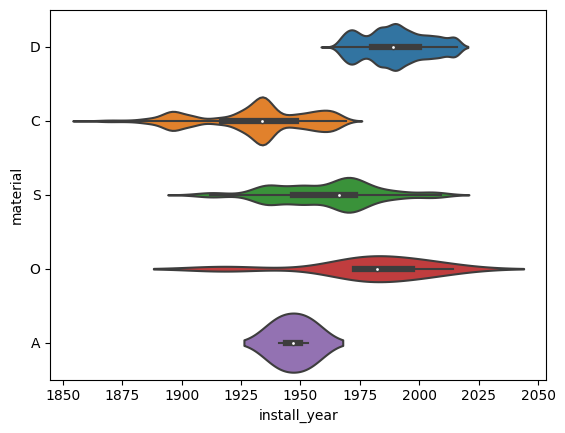

In [93]:
sns.violinplot(y = df2['material'], x=df2['install_year'])
plt.show()

In [94]:
df2.groupby('material', as_index=False)['pipe_year'].mean().sort_values('pipe_year', ascending=False)

,material,pipe_year
1,C,65.216006
4,S,40.533333
3,O,21.000000
2,D,14.496774
0,A,NaN


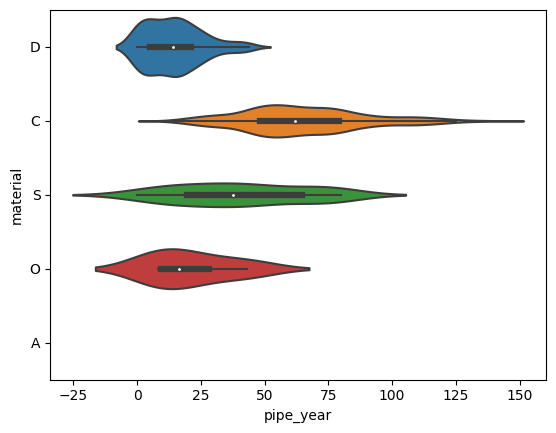

In [95]:
sns.violinplot(y = df2['material'], x=df2['pipe_year'])
plt.show()

Different range of temporal variables also affects history variable

In [96]:
df2[df2['history'] > 2].groupby('material')['pipe_id'].count()

material
C    94
D     1
S     1
Name: pipe_id, dtype: int64

In [97]:
# average pipe_year by history

df2[df2['history'] > 0].groupby('history', as_index=False)['pipe_year'].mean()

,history,pipe_year
0,1.0,58.272179
1,2.0,62.461187
2,3.0,63.983333
3,4.0,66.300000
4,5.0,62.777778
5,6.0,60.666667
6,7.0,56.000000
7,8.0,61.500000


looking at breakage records of pipes with multiple breakage history (history value of more than 2 in this case), again it makes sense to see more material C records here as mean pipe_year positively correlates to history values and only material C can have certain high values of pipe_year

Again, other material pipes may also break as much or even more than material C pipes in its lifetime, but as their install_year records only start from certain later point in this dataset, such data is not present

## Correlation

Lastly I will take a look at correlation of the variables

In [98]:
df2.corr()

,install_year,diameter,break_year,history,pipe_year
install_year,1.000000,0.016486,0.001697,-0.088671,-0.915784
diameter,0.016486,1.000000,-0.046312,-0.013583,-0.078681
break_year,0.001697,-0.046312,1.000000,0.169920,0.400117
history,-0.088671,-0.013583,0.169920,1.000000,0.057156
pipe_year,-0.915784,-0.078681,0.400117,0.057156,1.000000


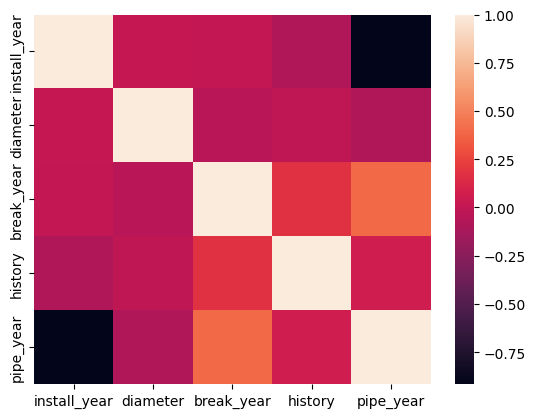

In [99]:
sns.heatmap(df2.corr())
plt.show()

Negative correlation for pipe_year and history against install_year as more recent the install_year value gets, history and pipe_year values to lower

Positive correlation is found between pipe_year and break_year, as more recent the break_year value gets, the year difference with install_year values to get bigger



## Conclusion

**Here are insights on potential factors affecting pipe breakage summarizing my findings throughout the analysis:**

- The most potential factors affecting pipe breakage is pipe material and number of years since pipe installation (install_year and break_year)

- diameter is less potential factor affecting pipe breakage on its own, however the combination of diameter and material is a higher potential factor